# Case Study in Data Visualization

## Information on the Diamond Dataset

In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

You can find a copy of the dataset in the Resources tab of the classroom; it will automatically be available to you in the workspaces of this lesson. The dataset consists of almost 54,000 rows and 10 columns:

* price: Price in dollars. Data was collected in 2008.
* carat: Diamond weight. 1 carat is equal to 0.2 grams.
* cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
* color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
* clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
* x, y, z: Diamond length, width, and depth, respectively, in mm.
* table: Ratio of width of top face of diamond to its overall width, as a percentage.
* depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond. You can see an example report covering all of the variables in the project information lesson.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [5]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

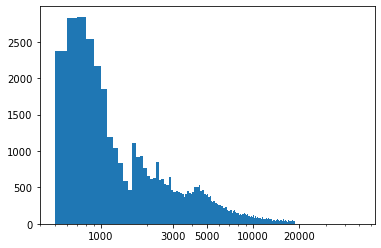

In [21]:
# univariate plot of diamond prices
bins=np.arange(500, 50000, 100)
plt.hist(data=diamonds, x='price', bins=bins);
plt.xscale('log')
x_ticks = [1000, 3000, 5000, 10000, 20000]
plt.xticks(x_ticks, x_ticks);

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

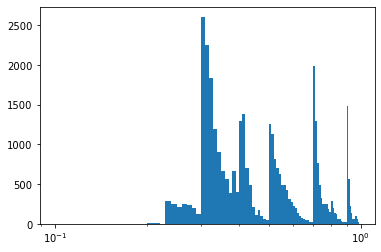

In [9]:
# univariate plot of carat weights
bins = np.arange(0.1, 1, 0.01)
plt.hist(data=diamonds, x='carat', bins=bins);
plt.xscale('log')

Carat distribution comment: You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

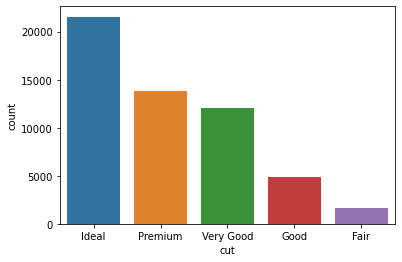

In [10]:
from pandas.api.types import CategoricalDtype

# univariate plots of cut, color, and clarity grades
ordered_cat=['Ideal','Premium','Very Good', 'Good', 'Fair']
diamonds['cut'] = diamonds['cut'].astype(CategoricalDtype(categories=ordered_cat, ordered=True))
sb.countplot(data=diamonds, x='cut');

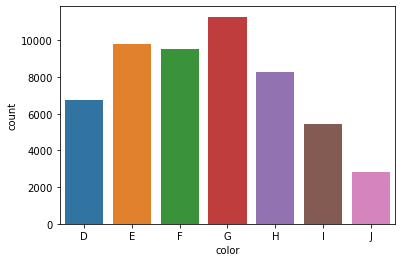

In [11]:
ordered_cat2=['D', 'E', 'F', 'G', 'H', 'I', 'J']
diamonds['color'] = diamonds['color'].astype(CategoricalDtype(categories=ordered_cat2, ordered=True))
sb.countplot(data=diamonds, x='color');

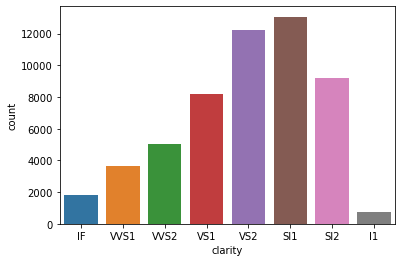

In [12]:
ordered_cat3=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
diamonds['clarity'] = diamonds['clarity'].astype(CategoricalDtype(categories=ordered_cat3, ordered=True))
sb.countplot(data=diamonds, x='clarity');

General categorical feature comment: Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

Color distribution comment: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

Clarity distribution comment: There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1)

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

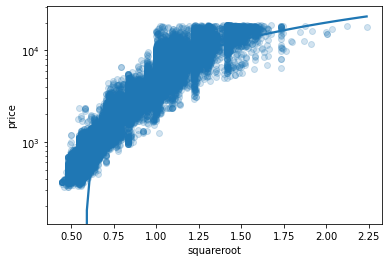

In [37]:
# bivariate plot of price vs. carat
def get_square_root(num):
    return num ** (1. / 2)

#ytick=['100', '1000', '10000', '20000']

diamonds['squareroot'] = diamonds['carat'].apply(lambda x: get_square_root(x))
sb.regplot(data=diamonds, x='squareroot', y='price', scatter_kws= {'alpha':1/5});
plt.yscale('log');
#plt.yticks(ytick, ytick)

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

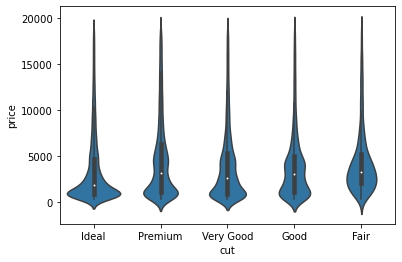

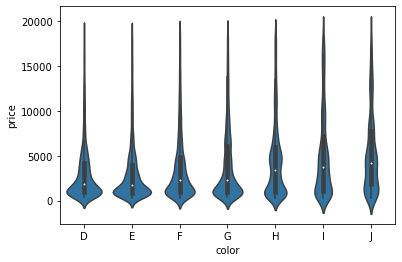

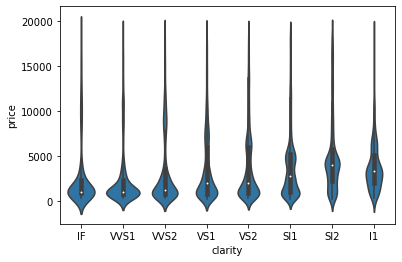

In [14]:
# bivariate plots of price vs. cut, color, clarity
base_color=sb.color_palette()[0];
for c in ['cut', 'color', 'clarity']:
    sb.violinplot(data=diamonds, x=c, y='price', color=base_color);
    plt.show()

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

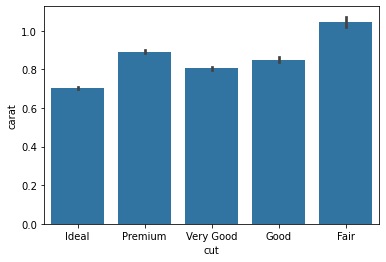

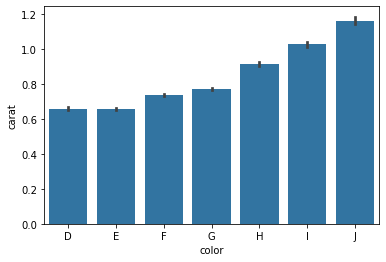

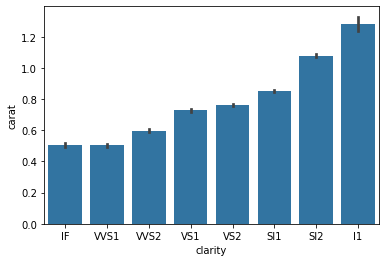

In [15]:
# bivariate plots of carat vs. cut, color, clarity
base_color=sb.color_palette()[0];
for c in ['cut', 'color', 'clarity']:
    sb.barplot(data=diamonds, x=c, y='carat', color=base_color);
    plt.show()

Carat vs. Categorical comment: These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>

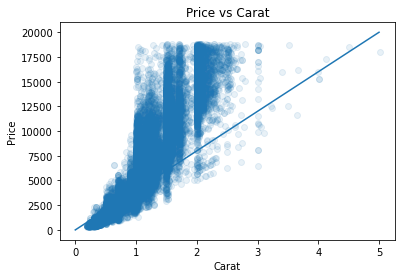

In [47]:
# bivariate plot of price vs. carat
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 0.1)

plt.plot([0,5], [0, 20000])

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat');

In [48]:
diamonds[['carat', 'price']].describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


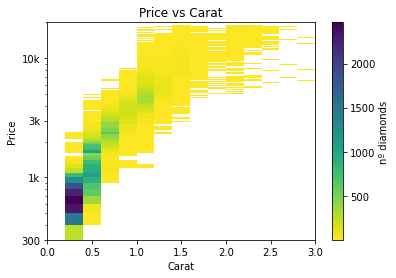

In [49]:
bins_x = np.arange(0.2, diamonds['carat'].max()+0.2, 0.2)
bins_y = np.arange(300, diamonds['price'].max()+100, 100)

plt.hist2d(data = diamonds, x = 'carat', y = 'price', bins = [bins_x, bins_y], cmin = 0.5, cmap = 'viridis_r')
plt.colorbar(label = 'nº diamonds')

plt.yscale('log')
y_ticks = [300, 1000, 3000, 10000, 30000]
y_ticks_names = ['300', '1k', '3k', '10k', '30k']
plt.yticks(y_ticks, y_ticks_names)

plt.xlim((0,3))
plt.ylim((300, 20000))

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat');

Price vs. Carat comment 1: Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.

Price vs. Carat comment 2: Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

C:\Users\heloi\AppData\Local\Temp/ipykernel_25904/1454489705.py:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0,3))


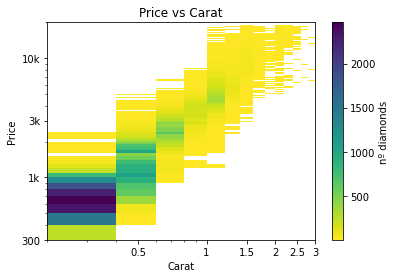

In [51]:
bins_x = np.arange(0.2, diamonds['carat'].max()+0.2, 0.2)
bins_y = np.arange(300, diamonds['price'].max()+100, 100)

plt.hist2d(data = diamonds, x = 'carat', y = 'price', bins = [bins_x, bins_y], cmin = 0.5, cmap = 'viridis_r')
plt.colorbar(label = 'nº diamonds')

plt.yscale('log')
y_ticks = [300, 1000, 3000, 10000, 30000]
y_ticks_names = ['300', '1k', '3k', '10k', '30k']
plt.yticks(y_ticks, y_ticks_names)

plt.xscale('log')
x_ticks = [0, 0.5, 1, 1.5, 2, 2.5, 3]
plt.xticks(x_ticks, x_ticks)

plt.xlim((0,3))
plt.ylim((300, 20000))

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat');

Price vs. Carat comment 3: One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

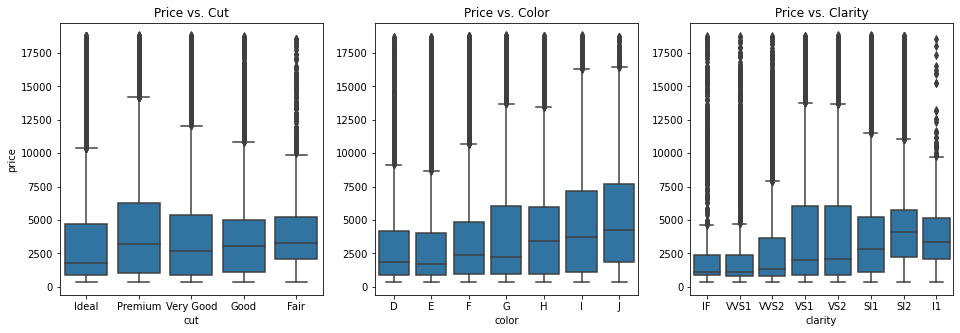

In [52]:
# bivariate plots of price vs. cut, color, clarity
plt.figure(figsize=[16,5])
base_color = sb.color_palette()[0]

# price vs. cut
plt.subplot(1, 3, 1)
sb.boxplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.title('Price vs. Cut')

# price vs. color
plt.subplot(1, 3, 2)
sb.boxplot(data = diamonds, x = 'color', y = 'price', color = base_color)
plt.ylabel('')
plt.title('Price vs. Color')

# price vs. clarity
plt.subplot(1, 3, 3)
sb.boxplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
plt.ylabel('')
plt.title('Price vs. Clarity');

Price vs. Categorical comment 1: There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it decrease with increasing gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?

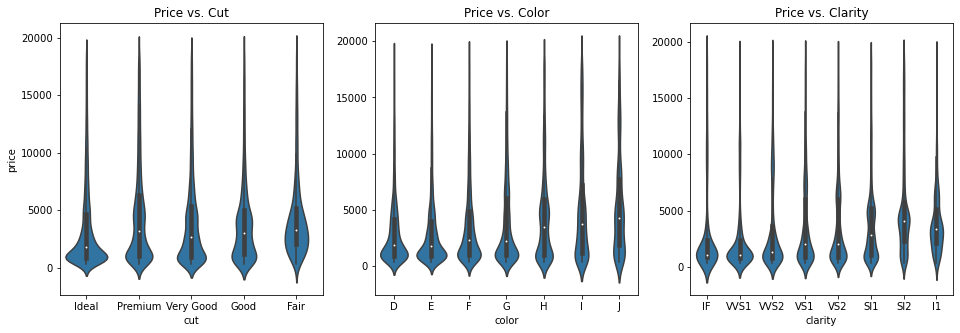

In [53]:
# bivariate plots of price vs. cut, color, clarity
plt.figure(figsize=[16,5])

# price vs. cut
plt.subplot(1, 3, 1)
sb.violinplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.title('Price vs. Cut')

# price vs. color
plt.subplot(1, 3, 2)
sb.violinplot(data = diamonds, x = 'color', y = 'price', color = base_color)
plt.ylabel('')
plt.title('Price vs. Color')

# price vs. clarity
plt.subplot(1, 3, 3)
sb.violinplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
plt.ylabel('')
plt.title('Price vs. Clarity');

Price vs. Categorical comment 2: With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

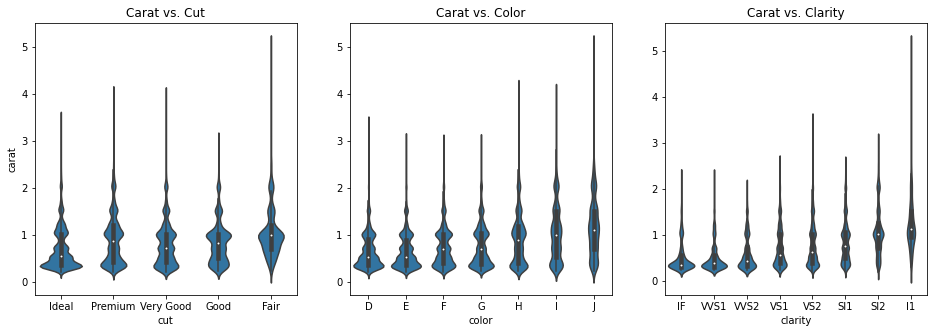

In [54]:
# bivariate plots of carat vs. cut, color, clarity
plt.figure(figsize=[16,5])

# price vs. cut
plt.subplot(1, 3, 1)
sb.violinplot(data = diamonds, x = 'cut', y = 'carat', color = base_color)
plt.title('Carat vs. Cut')

# price vs. color
plt.subplot(1, 3, 2)
sb.violinplot(data = diamonds, x = 'color', y = 'carat', color = base_color)
plt.ylabel('')
plt.title('Carat vs. Color')

# price vs. clarity
plt.subplot(1, 3, 3)
sb.violinplot(data = diamonds, x = 'clarity', y = 'carat', color = base_color)
plt.ylabel('')
plt.title('Carat vs. Clarity');

Carat vs. Categorical comment: These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

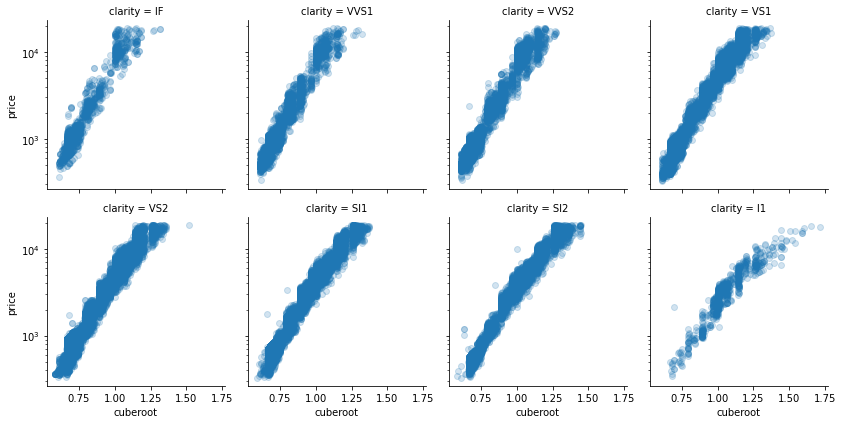

In [16]:
# multivariate plot of price by carat weight, and clarity
def get_cube_root(num):
    return num ** (1. / 3)

diamonds['cuberoot'] = diamonds['carat'].apply(lambda x: get_cube_root(x))

g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=4);
g.map(plt.scatter, 'cuberoot', 'price', alpha=1/5);
plt.yscale('log')

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


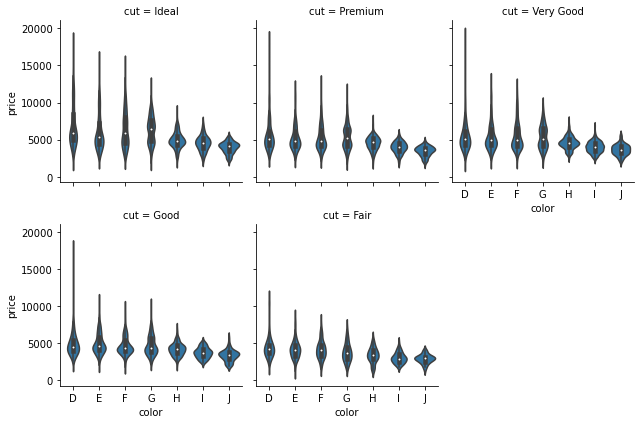

In [17]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
diamond_sub = diamonds[(diamonds["carat"] > 0.8) & (diamonds["carat"] < 1.2)]
g=sb.FacetGrid(data = diamond_sub, col='cut', col_wrap=3);
g.map(sb.violinplot, 'color', 'price');

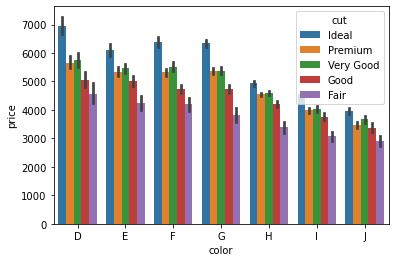

In [18]:
sb.barplot(data = diamond_sub,x='color', y='price', hue='cut');

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [55]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

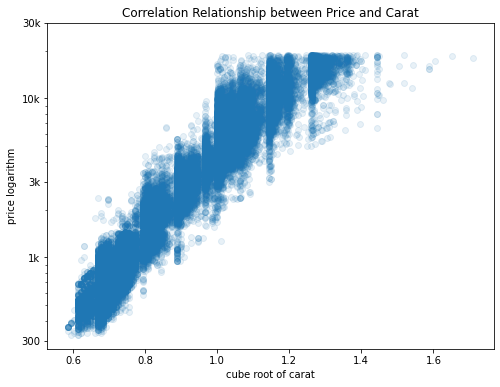

In [56]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on carat
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 0.1)

plt.yscale('log')
y_ticks = [300, 1000, 3000, 10000, 30000]
y_ticks_names = ['300', '1k', '3k', '10k', '30k']
plt.yticks(y_ticks, y_ticks_names)

plt.xlabel('cube root of carat')
plt.ylabel('price logarithm')
plt.title('Correlation Relationship between Price and Carat')

plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.

* Does the plot has an informative title?
* Are the axis labels informative?
* Are the tick values interpretable?
* Do we need to worry about any of the plot aesthetics?
* Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.
As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.

There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [57]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

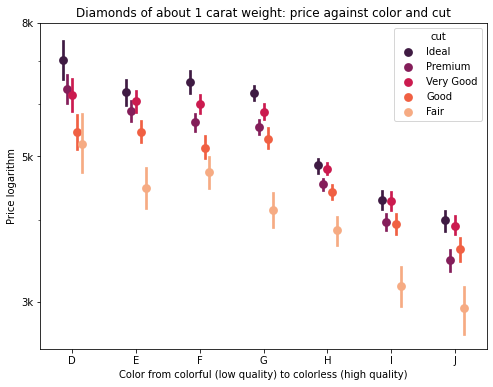

In [58]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut',
                 palette = 'rocket', dodge = 0.3, linestyles = '')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.xlabel('Color from colorful (low quality) to colorless (high quality)')
plt.ylabel('Price logarithm')
plt.title('Diamonds of about 1 carat weight: price against color and cut')
plt.show();

Price vs. Color, Cut: Polishing comment 1: Don't forget to provide an informative title and axis labels.

Price vs. Color, Cut: Polishing comment 2: There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.

If you want to check your work on the case study against a reference, take a look at the example project in the project lesson! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.

## Price Prediction

### Problem Statement

A diamond distributor has recently decided to exit the market and has put up a set of 3,000 diamonds up for auction. Seeing this as a great opportunity to expand its inventory, a jewelry company has shown interest in making a bid. To decide how much to bid, you will use a large database of diamond prices to build a model to predict the price of a diamond based on its attributes. Then you will use the results of that model to make a recommendation for how much the company should bid.

The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of the that price, so your recommended bid price should represent that.

Check for missing values in the dataframe if any

In [174]:
diamonds.isnull().any().any()

False

In [175]:
#To get total number of missing values
diamonds.isnull().sum().sum()

0

In [176]:
print("Maximum price:{} \tMinimum Price:{}".format(diamonds["price"].max(),diamonds["price"].min()))
print("Maximum Weight:{} \tMinimum Weight:{}".format(diamonds["carat"].max(),diamonds["carat"].min()))

Maximum price:18823 	Minimum Price:326
Maximum Weight:5.01 	Minimum Weight:0.2


Relationship between Carat and Price

In [177]:
# Checks correlation between the specified features
diamonds[["carat","price"]].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


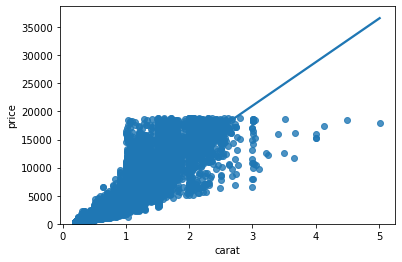

In [178]:
sb.regplot(x="carat",y="price",data=diamonds)
plt.ylim(0,None);

There's a strong positive correlation between the weight and price of the diamonds.

In [179]:
#### Olhar gráficos plotados anteriormente e fazer referência indicando algumas conclusões

From the boxplot we can see we have several outliers in each category in the cut feature when it comes to pricing. Here we see that the distribution of price between the different cut categories differs; as such cut could potentially be a predictor of price.

From the boxplot we can see we have several outliers in each category in the clarity feature when it comes to pricing. Here we see that the distribution of price between the different clarity categories differs; as such clarity could potentially be a predictor of price

If we want to know which types of cut, clarity and color are most pricy, we can group them and then get their averages

In [180]:
grouped_df_cut=diamonds[["cut","price"]]
grouped_df_cut=grouped_df_cut.groupby(["cut"],as_index=False).mean()
grouped_df_cut

,cut,price
0,Ideal,3457.541970
1,Premium,4584.257704
2,Very Good,3981.759891
3,Good,3928.864452
4,Fair,4358.757764


In [181]:
grouped_df_color=diamonds[["color","price"]]
grouped_df_color=grouped_df_color.groupby(["color"],as_index=False).mean()
grouped_df_color

,color,price
0,D,3169.954096
1,E,3076.752475
2,F,3724.886397
3,G,3999.135671
4,H,4486.669196
5,I,5091.874954
6,J,5323.818020


In [182]:
grouped_df_clarity=diamonds[["clarity","price"]]
grouped_df_clarity=grouped_df_clarity.groupby(["clarity"],as_index=False).mean()
grouped_df_clarity

,clarity,price
0,IF,2864.839106
1,VVS1,2523.114637
2,VVS2,3283.737071
3,VS1,3839.455391
4,VS2,3924.989395
5,SI1,3996.001148
6,SI2,5063.028606
7,I1,3924.168691


We can use a pivot tabel to better visualize the features.

In [183]:
# First I will group the cut, color and price features
grouped_cco_df = diamonds[["cut","color","price"]]
grouped_cco_df = grouped_cco_df.groupby(["cut","color"], as_index=False).mean()
grouped_cco_pivot = grouped_cco_df.pivot(index="cut",columns="color")
display(grouped_cco_pivot)

# Then we'll group cut, clarity and price features
grouped_ccl_df = diamonds[["cut","clarity","price"]]
grouped_ccl_df = grouped_ccl_df.groupby(["cut","clarity"], as_index=False).mean()
grouped_ccl_pivot = grouped_ccl_df.pivot(index="cut",columns="clarity")
display(grouped_ccl_pivot)

price                                                      \
color                D            E            F            G            H   
cut                                                                          
Ideal      2629.094566  2597.550090  3374.939362  3720.706388  3889.334831   
Premium    3631.292576  3538.914420  4324.890176  4500.742134  5216.706780   
Very Good  3470.467284  3214.652083  3778.820240  3872.753806  4535.390351   
Good       3405.382175  3423.644159  3495.750275  4123.482204  4276.254986   
Fair       4291.061350  3682.312500  3827.003205  4239.254777  5135.683168   

                                     
color                I            J  
cut                                  
Ideal      4451.970377  4918.186384  
Premium    5946.180672  6294.591584  
Very Good  5255.879568  5103.513274  
Good       5078.532567  4574.172638  
Fair       4685.445714  4975.655462

price                                                      \
clarity             IF         VVS1         VVS2          VS1          VS2   
cut                                                                          
Ideal      2272.913366  2468.129458  3250.290100  3489.744497  3284.550385   
Premium    3856.143478  2831.206169  3795.122989  4485.462041  4550.331248   
Very Good  4396.216418  2459.441065  3037.765182  3805.353239  4215.759552   
Good       4098.323944  2254.774194  3079.108392  3801.445988  4262.236196   
Fair       1912.333333  3871.352941  3349.768116  4165.141176  4174.724138   

                                                  
clarity            SI1          SI2           I1  
cut                                               
Ideal      3752.118169  4755.952656  4335.726027  
Premium    4455.269371  5545.936928  3947.331707  
Very Good  3932.391049  4988.688095  4078.226190  
Good       3689.533333  4580.260870  3596.635417  
Fair       4208.279412  5173.916309  3703.533333

The main question we want to answer with our visualization and analysis is: "What are the main characteristics which have the most impact on the diamond price?" To get a better measure of the important characteristics, we look at the correlation of these variables with the diamond price, in other words: how is the diamond price dependent on this variable?

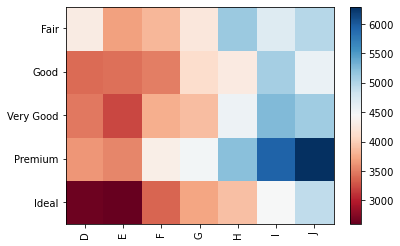

In [184]:
# Modified Heat map to show relationship between cut, color and price with labeled axes
fig, ax = plt.subplots()
im = ax.pcolor(grouped_cco_pivot, cmap='RdBu')

#label names
row_labels = grouped_cco_pivot.columns.levels[1]
col_labels = grouped_cco_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_cco_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_cco_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

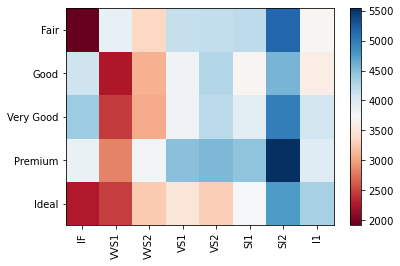

In [185]:
# Modified Heat map to show relationship between cut, clarity and price with labeled axes
fig, ax = plt.subplots()
im = ax.pcolor(grouped_ccl_pivot, cmap='RdBu')

#label names
row_labels = grouped_ccl_pivot.columns.levels[1]
col_labels = grouped_ccl_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_ccl_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_ccl_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

* Correlation: a measure of the extent of interdependence between variables.

* Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.

We will obtain the correlation and p-values using the "stats" module in the "scipy" library

In [186]:
from scipy import stats

Now let's calculate the Peason Coefficient and P-value between Carat and Price

In [187]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(diamonds["carat"],diamonds["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  0.921591301193477 and the P_value =  0.0


Conclusion:
Since the p-value is $

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

* P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Let's group the different types of cut, color and clarity and see if they impact price

In [188]:
#ANOVA results for cut and Price
f_val,p_val = stats.f_oneway(diamonds[["cut","price"]].groupby(["cut"]).get_group("Fair")["price"],diamonds[["cut","price"]].groupby(["cut"]).get_group("Good")["price"],diamonds[["cut","price"]].groupby(["cut"]).get_group("Ideal")["price"],diamonds[["cut","price"]].groupby(["cut"]).get_group("Premium")["price"],diamonds[["cut","price"]].groupby(["cut"]).get_group("Very Good")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

#ANOVA results for color and Price
f_val,p_val = stats.f_oneway(diamonds[["color","price"]].groupby(["color"]).get_group("D")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("E")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("F")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("G")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("H")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("I")["price"],diamonds[["color","price"]].groupby(["color"]).get_group("J")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

#ANOVA results for clarity and Price
f_val,p_val = stats.f_oneway(diamonds[["clarity","price"]].groupby(["clarity"]).get_group("I1")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("IF")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("SI1")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("SI2")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("VS1")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("VS2")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("VVS1")["price"],diamonds[["clarity","price"]].groupby(["clarity"]).get_group("VVS2")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 175.68871735080606 , P = 8.42830730759452e-150
ANOVA results: F= 290.20588071108835 , P = 0.0
ANOVA results: F= 215.01926041020076 , P = 1.9190895e-316


Conclusion:

Since the F-scores of the 3 categories with respect to price are quite large and the p-values are close to 0 we can adequately say the categories are statistically significant to use in modelling.

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the diamond price. We have narrowed it down to the following variables:

Continuous numerical variables: carat

Categorical variables:cut; color; clarity

### Model Development (Simple Linear and Multiple Linear regression)

#### Simple Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
LRObj = LinearRegression()
LRObj

LinearRegression()

We want to look at how weight in carats can help us predict diamond price. Using simple linear regression, we will create a linear function with "carat" as the predictor variable and the "price" as the response variable.

In [191]:
train_df = diamonds.copy()

In [192]:
X = train_df[["carat"]]
Y = train_df["price"]

Fit the linear model using carat

In [193]:
LRObj.fit(X,Y)

LinearRegression()

In [194]:
Predicted_Price_carat= LRObj.predict(X)
Predicted_Price_carat[0:6]

array([-472.38268791, -627.51120027, -472.38268791,   -6.99715083,
        148.13136152, -394.81843173])

From the prediction we can comfortably say, we can't use weight in carats as the only predictor variable in our model, we expect the price to increase but in our case the price decreases

Let's get the slope and the intercept for the model

In [195]:
print("slope = ",LRObj.coef_,"Intercept = ",LRObj.intercept_)

slope =  [7756.42561797] Intercept =  -2256.3605800454293


In [196]:
carat = 0 # variável
price = 7760.0334*carat - 2258.0374

#### Multiple Linear Regression Model

First create dummy Variables for the corresponding categorical variables

In [212]:
# create dummy variables for multiple categories
# drop_first=True handles n - 1 
diamonds_dm = diamonds.copy()
diamonds_dm = pd.get_dummies(diamonds_dm, columns=['cut', 'color','clarity'])
# this drops original cut, color and clarity columns
# and creates dummy variables

diamonds_dm.head()

,carat,depth,table,price,x,y,z,cuberoot,squareroot,cr_carat,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.479583,0.479583,0.612693,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.458258,0.458258,0.594392,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.479583,0.479583,0.612693,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.538516,0.538516,0.661911,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.556776,0.556776,0.676790,...,0,1,0,0,0,0,0,0,1,0


In [213]:
diamonds_dm.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cuberoot',
       'squareroot', 'cr_carat', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'cut_Good', 'cut_Fair', 'color_D', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [214]:
# Create a variable holding the predictor varaibles
pred_vars = diamonds_dm[["carat","cut_Good","cut_Ideal","cut_Premium","cut_Very Good","color_E",
                      "color_F","color_G","color_H","color_I","color_J","clarity_IF",
                      "clarity_SI1","clarity_SI2","clarity_VS1","clarity_VS2",
                      "clarity_VVS1","clarity_VVS1"]]

In [215]:
# Setup
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pred_vars, diamonds_dm["price"], test_size=0.2, random_state=42)

# Create/instantiate an MLR object
MLR_Obj = LinearRegression()
MLR_Obj

# Fit the MLR model
MLR_Obj.fit(X_train,y_train)

MLR_Obj.coef_

array([ 8710.86645345,  1137.18387741,  1575.19972971,  1388.01386001,
        1420.36824787,  -216.8189509 ,  -298.32394286,  -478.16168888,
        -989.16071853, -1415.93308911, -2287.65975302,  1027.54719673,
        -726.60628344, -1630.10724188,   183.47131237,  -126.12815074,
         336.41025596,   336.41025596])

In [216]:
MLR_Obj.intercept_

-3441.4665355870748

##### Validation

In [217]:
X_test.head()

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS1
1388,0.24,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
50052,0.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
41645,0.40,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42377,0.43,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
17244,1.55,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [218]:
# Make the prediction
predicted_prices = MLR_Obj.predict(X_test)
predicted_prices

array([ 418.99996598, 2732.88031242, 1401.2608246 , ...,  590.74476542,
       8733.24630137, 3185.68611664])

In [219]:
# Convert the predicted_prices array to a dataseries and add it as a column to the test_df
y_pred = pd.Series(predicted_prices)
y_pred.head(10)

0     418.999966
1    2732.880312
2    1401.260825
3    1475.400949
4    9788.650004
5    3422.473725
6    2461.422455
7    2537.255599
8    3004.337424
9    6348.353949
dtype: float64

In [220]:
 MLR_Obj.score(X_test, y_test)

0.8971875208567993

In [221]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8971875208567993

In [222]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print ('Mean squared error is', mean_squared_error(y_test, y_pred))
print('Mean absolute error is', mean_absolute_error(y_test, y_pred))

Mean squared error is 1634391.623900815
Mean absolute error is 831.0343722352379


 Conclusion

##### Recommendation

Now that you have the predicted price for each diamond, it’s time to calculate the bid price for the whole set. Note: The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of the that price, so your recommended bid price should represent that.

In [223]:
recommended_bid = y_pred.sum()*0.7
print("Bid worth:", recommended_bid)
print("Predicted Profit:", y_pred.sum() - recommended_bid)
print("Profit by Investment Ratio:", (y_pred.sum() - recommended_bid)/recommended_bid*100)

Bid worth: 29546235.987975948
Predicted Profit: 12662672.56627541
Profit by Investment Ratio: 42.85714285714287
